In [4]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [5]:
iris = load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


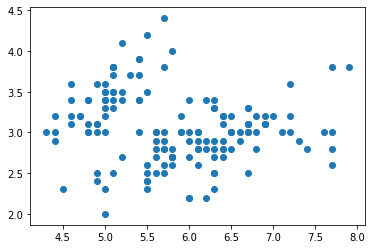

In [15]:
plt.scatter(df["sepal length (cm)"],df["sepal width (cm)"])

In [40]:
x = df.iloc[:,[0,1]]

In [41]:
wcss = []

for i in range(1,10):
    km = KMeans(n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_)

In [42]:
wcss

[130.47526666666667,
 58.20409278906671,
 37.05070212765958,
 28.034982153246226,
 21.00466066066066,
 17.379034367593192,
 14.82854346483657,
 12.788763481527546,
 11.22987290624752]

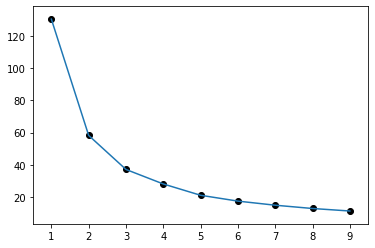

In [43]:
plt.plot(range(1,10),wcss)
plt.scatter(range(1,10),wcss,color = "k")

In [44]:
km = KMeans(n_clusters=3)
yp=km.fit_predict(x)
yp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [50]:
x["cluster"] = yp
x.head()

,sepal length (cm),sepal width (cm),cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


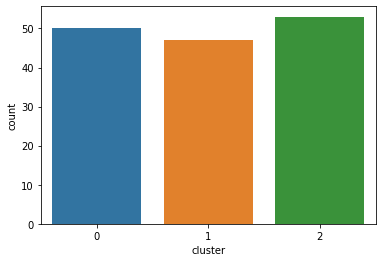

In [51]:
sn.countplot(x.cluster)

In [53]:
c1 = x[x.cluster== 0]
c2 = x[x.cluster==1]
c3 = x[x.cluster==2]

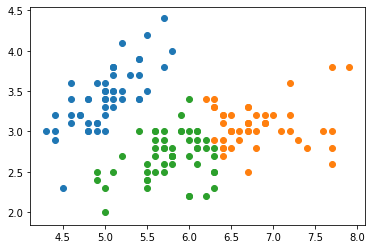

In [56]:
plt.scatter(c1["sepal length (cm)"],c1["sepal width (cm)"],label = "cluster_1")
plt.scatter(c2["sepal length (cm)"],c2["sepal width (cm)"],label = "cluster_2")
plt.scatter(c3["sepal length (cm)"],c3["sepal width (cm)"],label = "cluster_3")

In [63]:
x1 = x.drop("cluster",axis=1)
y1 = x.cluster

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x1,y1,test_size=0.2)


In [66]:
x_train.shape

(120, 2)

In [67]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [69]:
yp = knn.predict(x_test)
yp

array([2, 1, 0, 0, 2, 1, 0, 2, 2, 0, 2, 2, 2, 1, 2, 1, 0, 0, 2, 2, 0, 1,
       0, 2, 1, 1, 0, 2, 0, 2])

In [70]:
print(accuracy_score(y_test,yp))

1.0


In [71]:
cm = confusion_matrix(y_test,yp)
cm

array([[10,  0,  0],
       [ 0,  7,  0],
       [ 0,  0, 13]], dtype=int64)

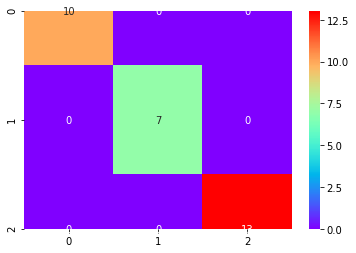

In [72]:
sn.heatmap(cm, annot=True, cmap="rainbow")